In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

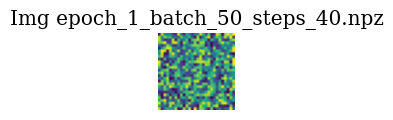

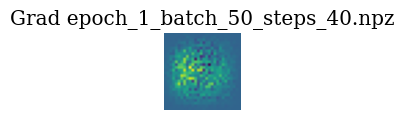

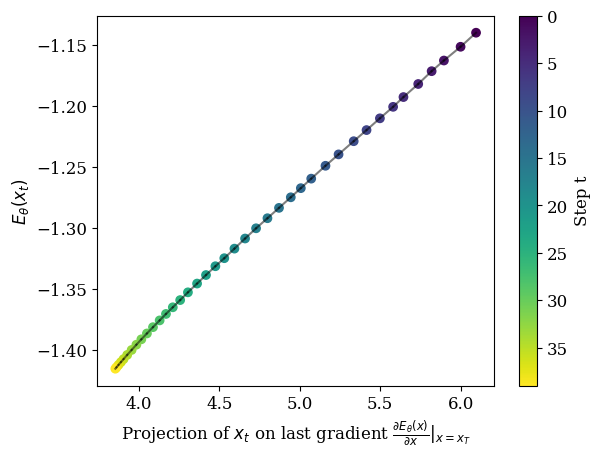

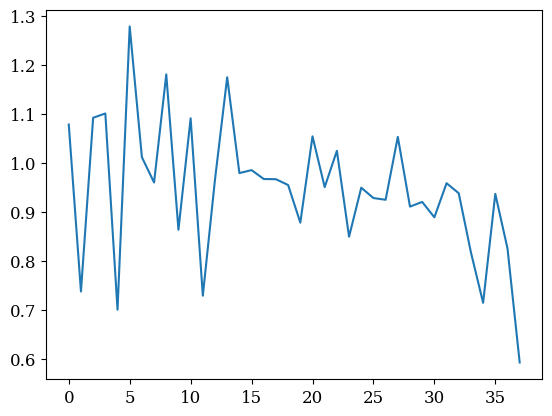

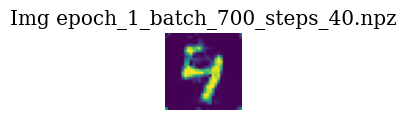

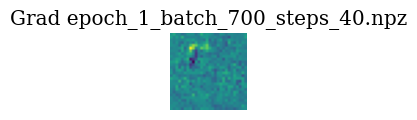

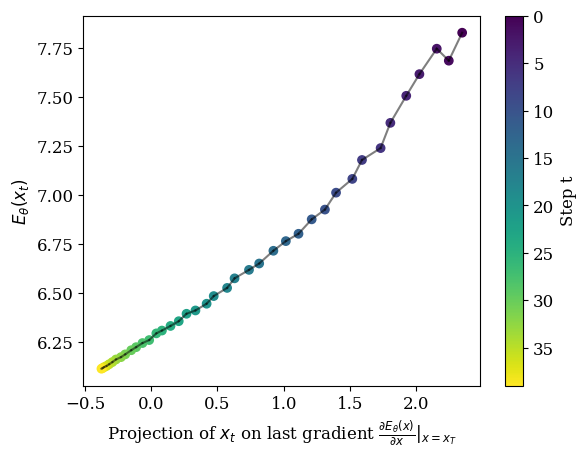

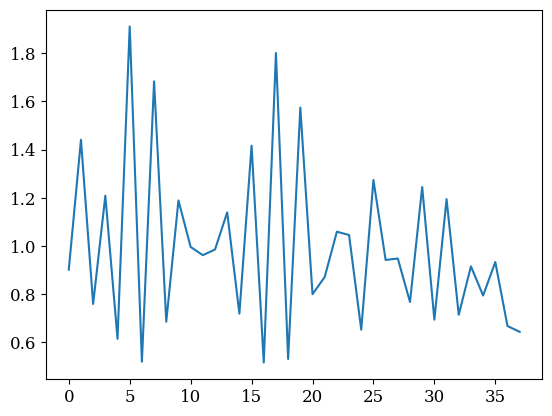

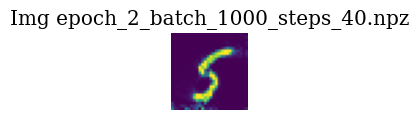

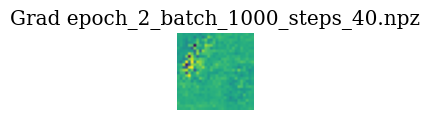

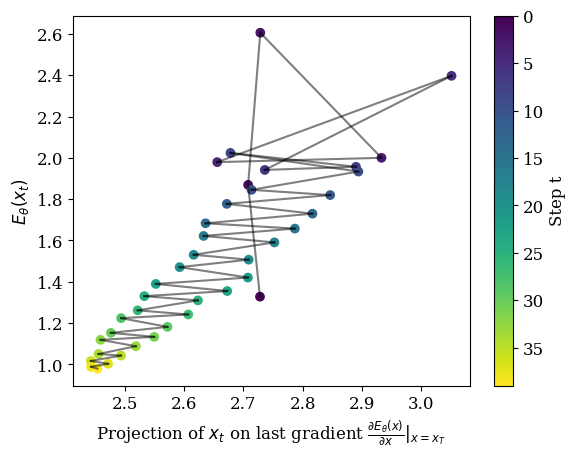

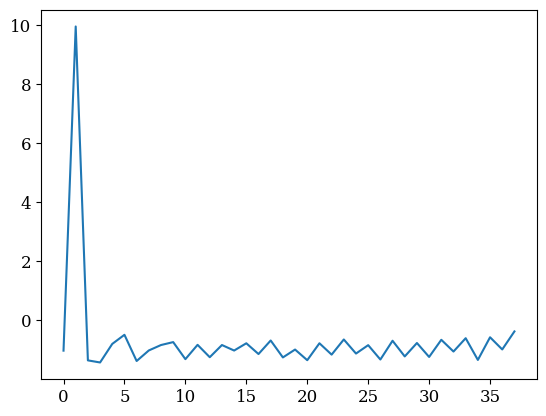

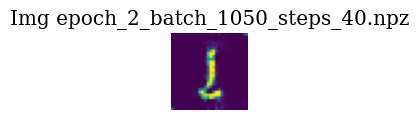

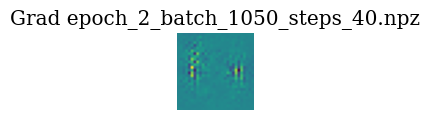

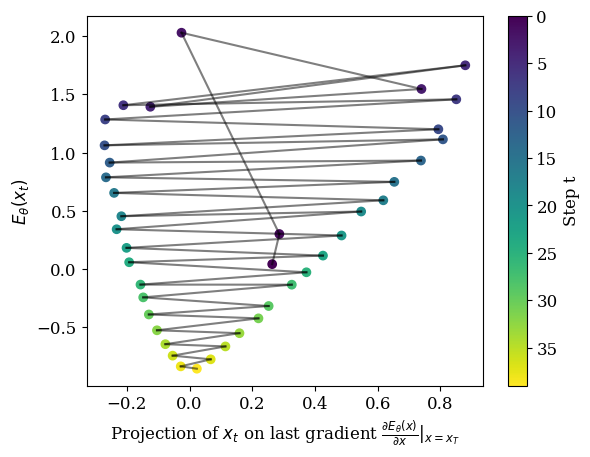

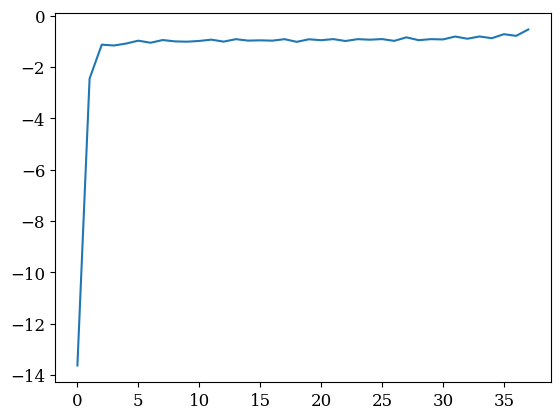

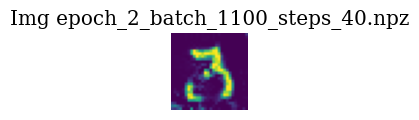

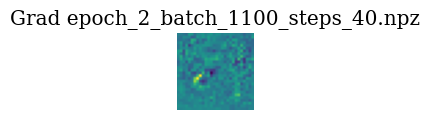

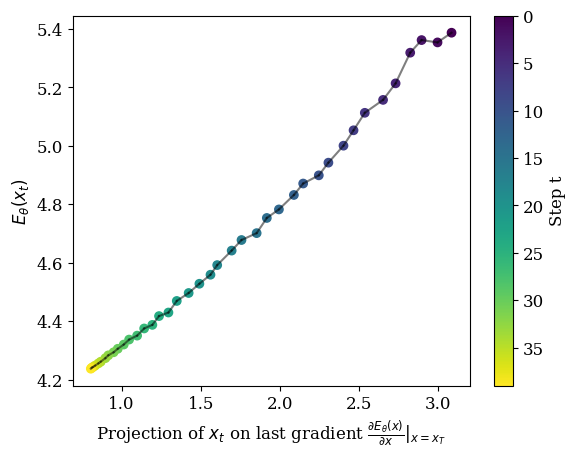

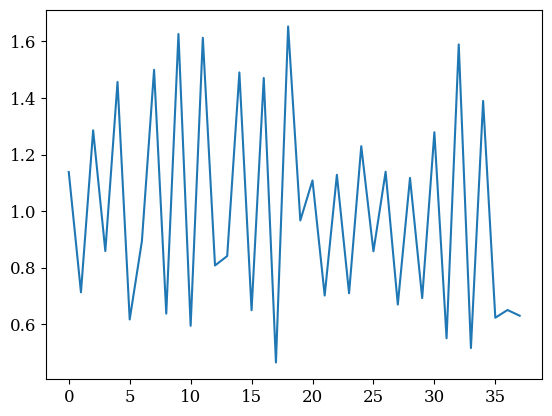

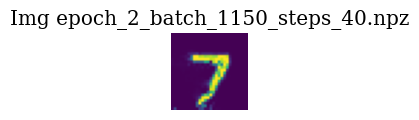

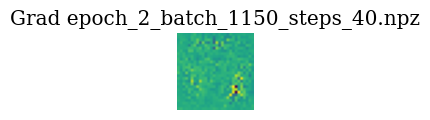

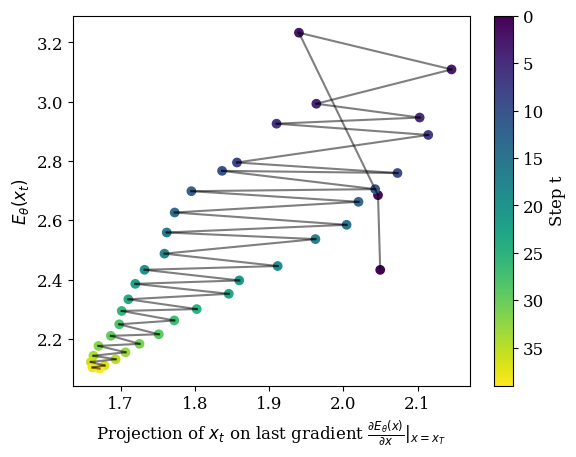

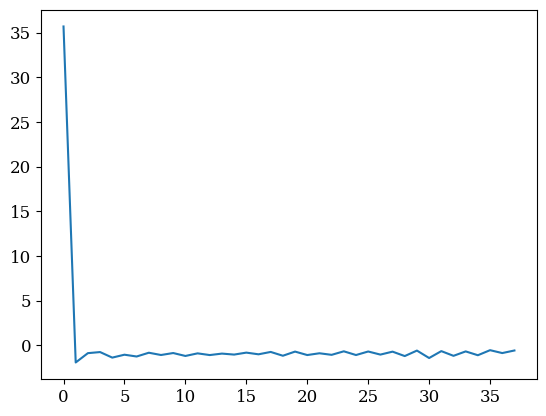

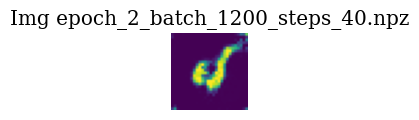

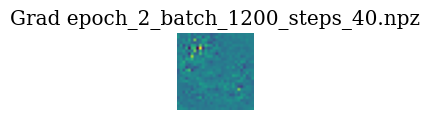

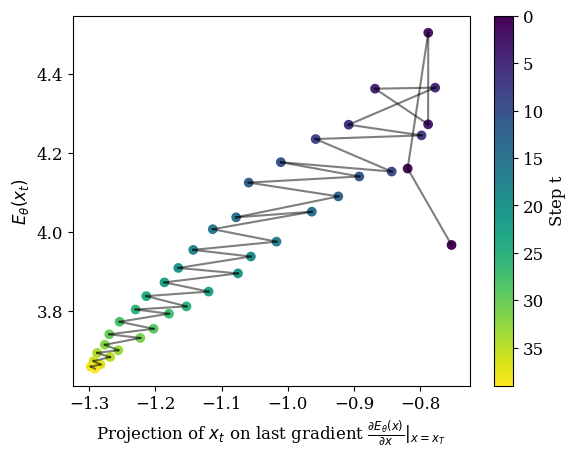

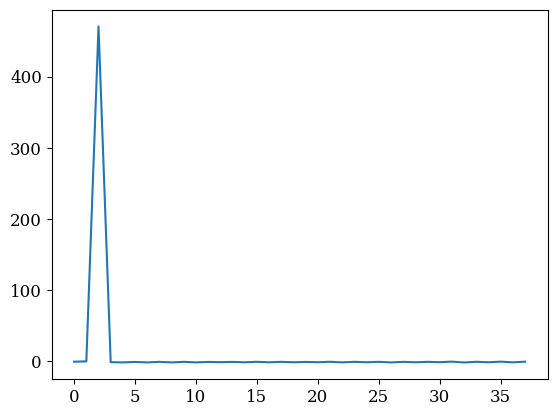

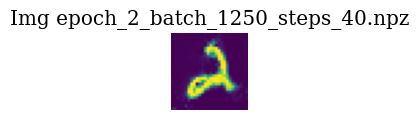

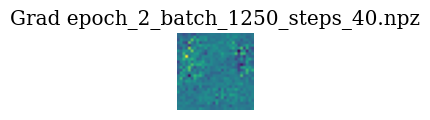

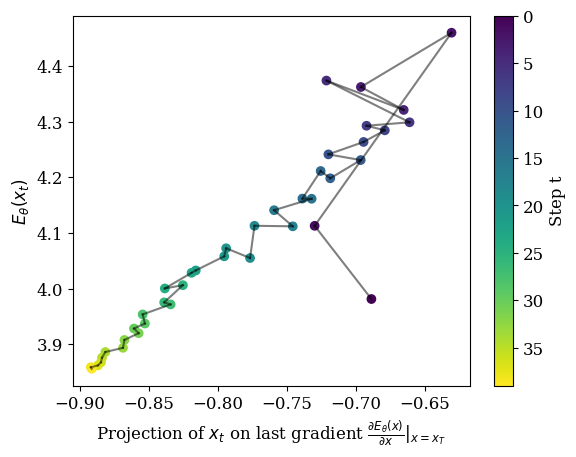

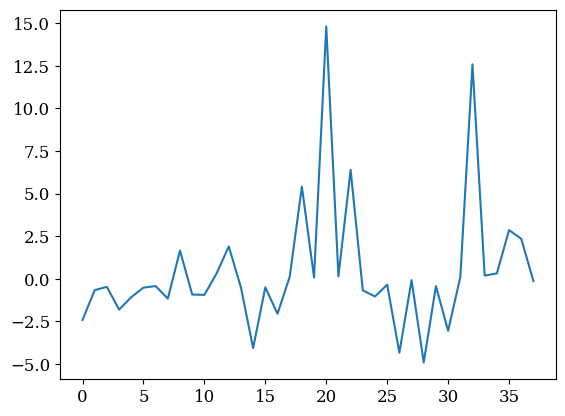

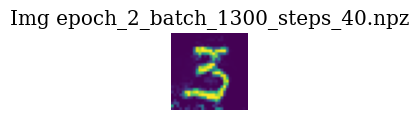

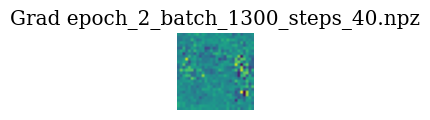

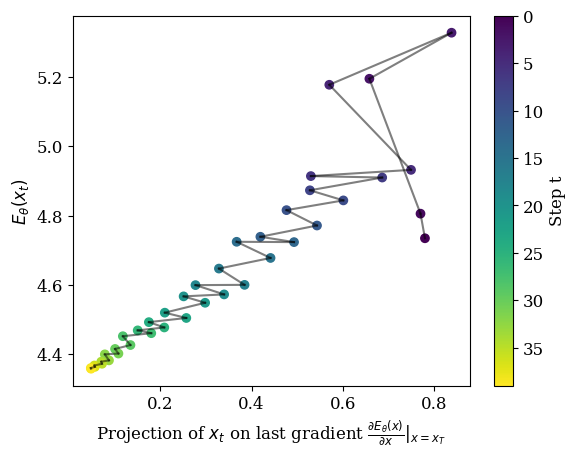

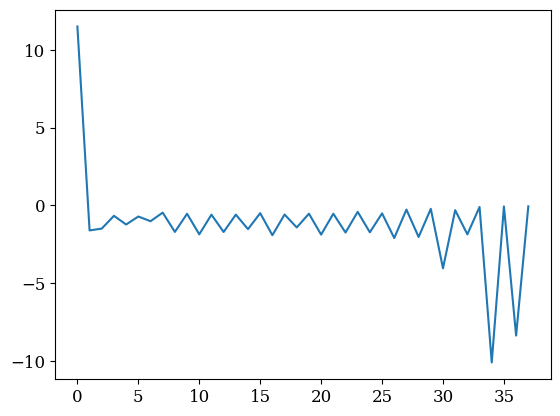

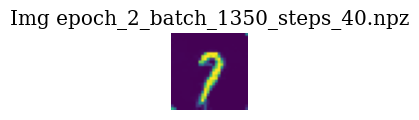

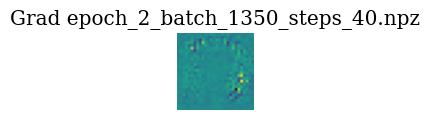

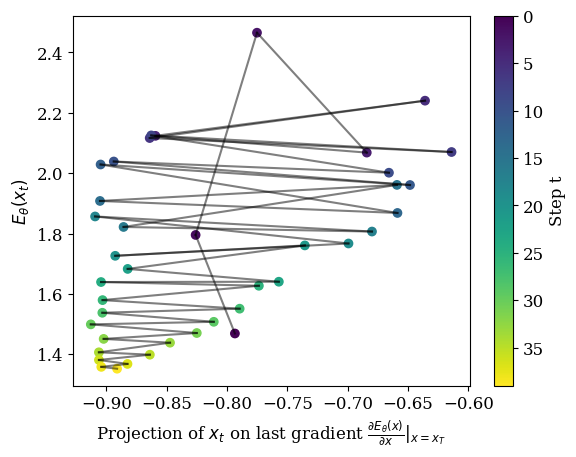

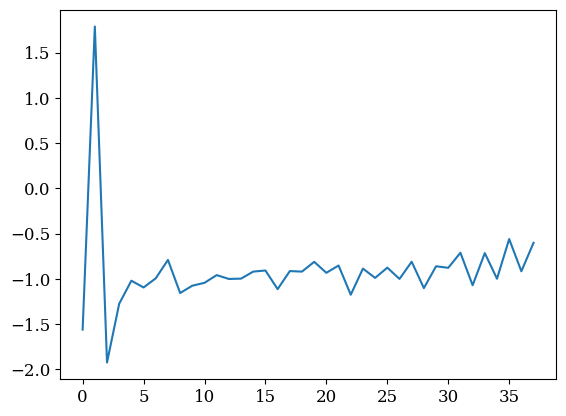

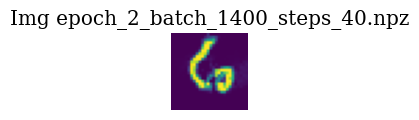

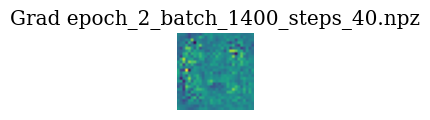

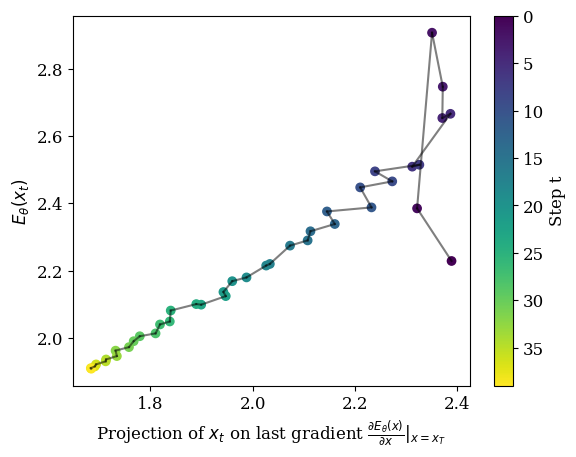

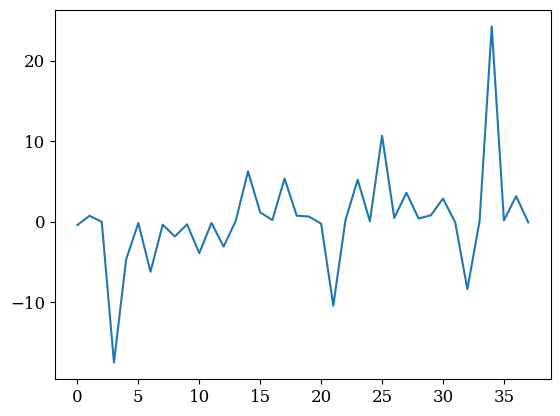

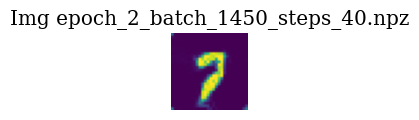

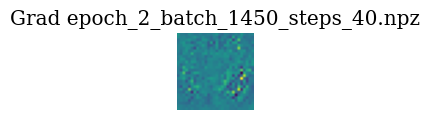

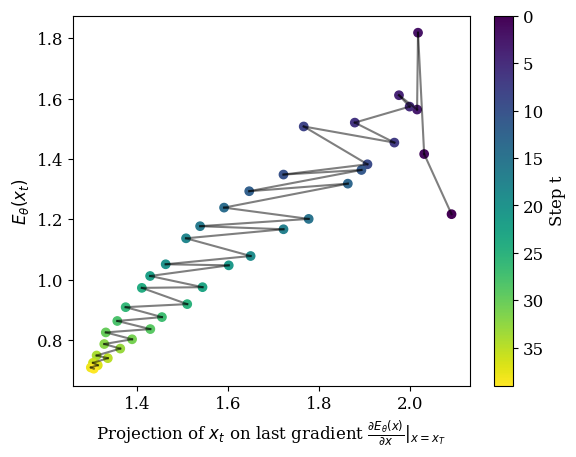

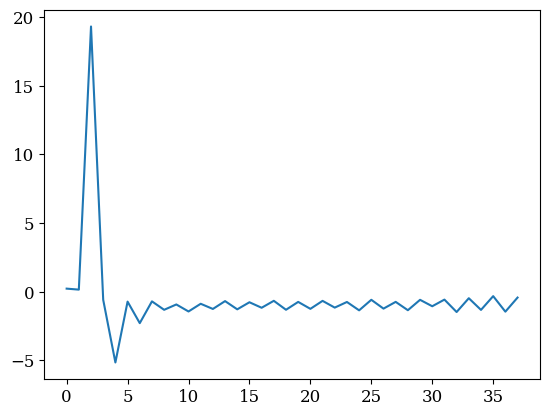

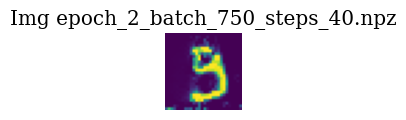

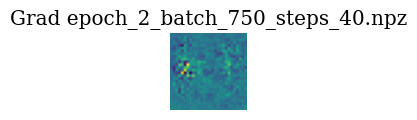

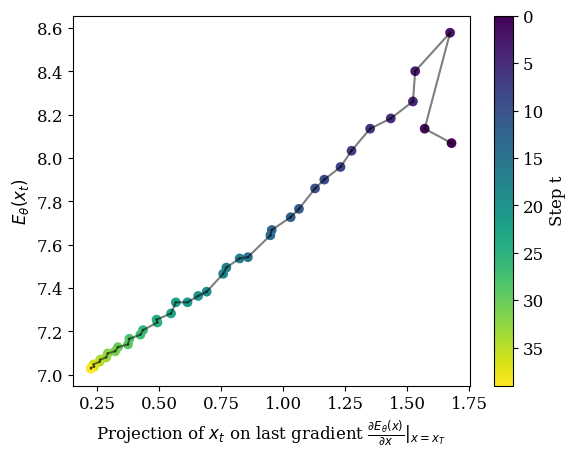

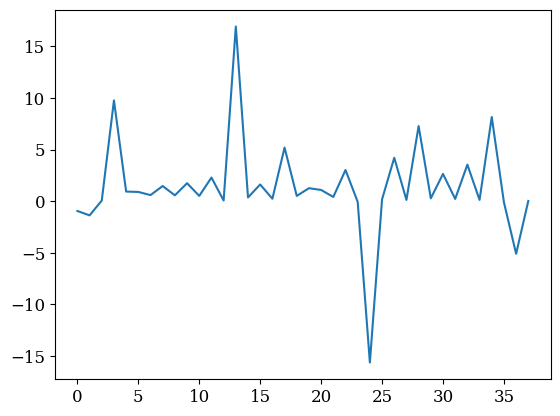

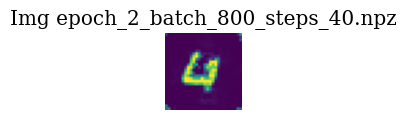

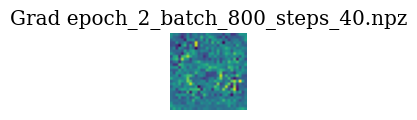

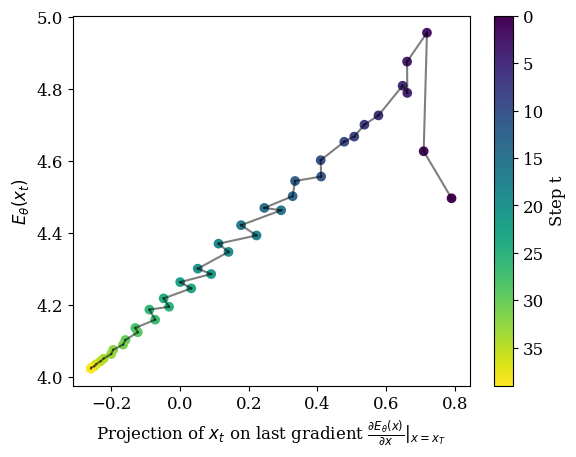

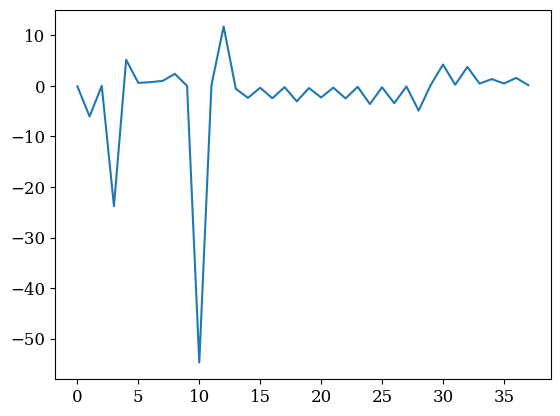

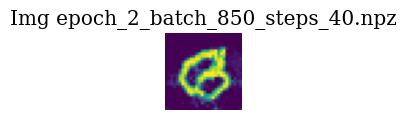

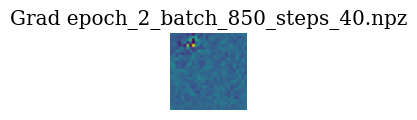

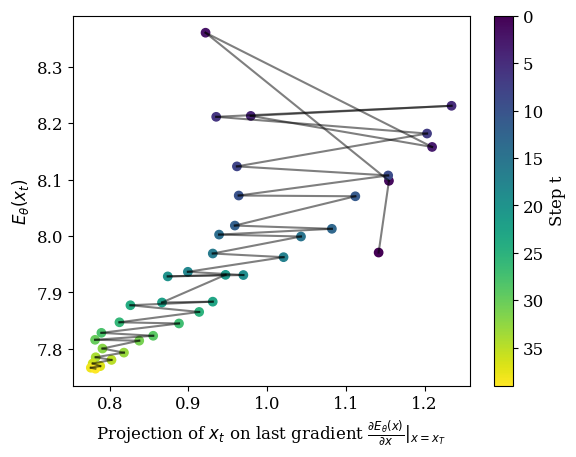

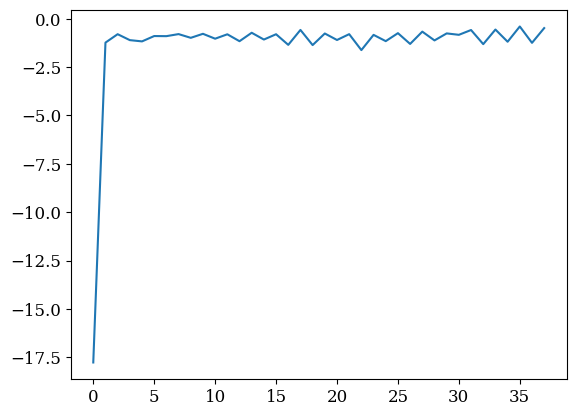

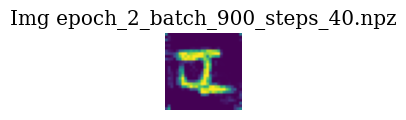

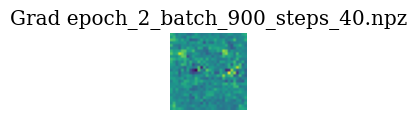

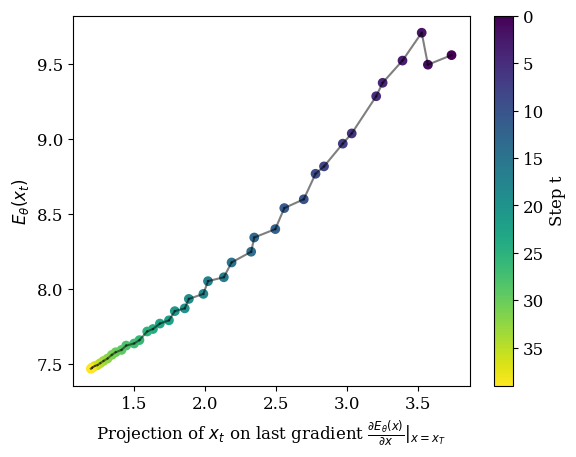

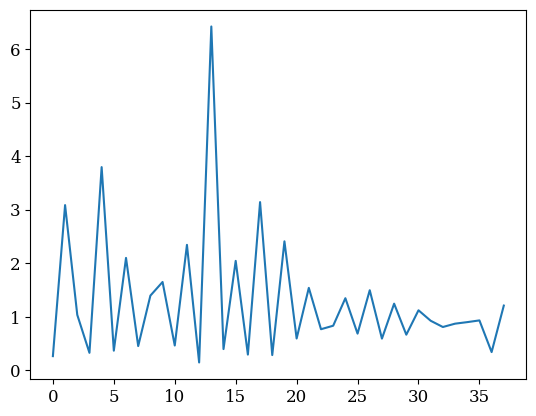

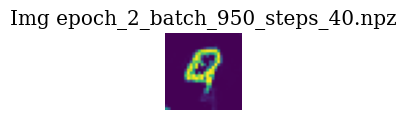

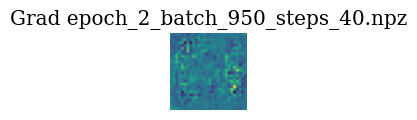

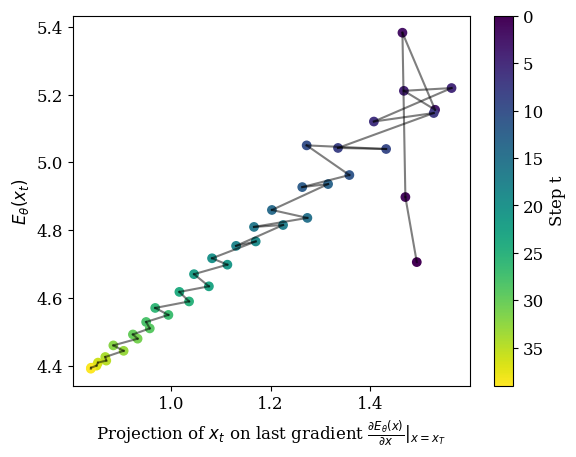

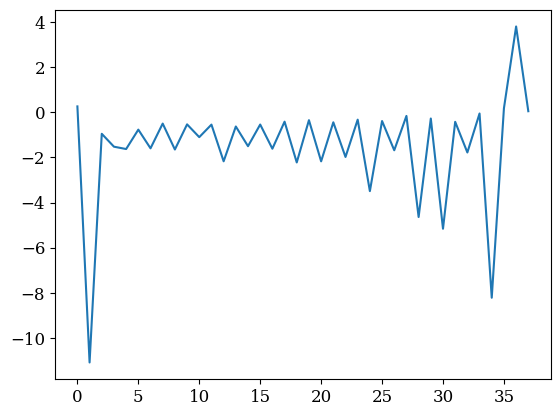

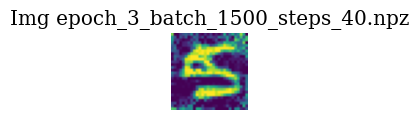

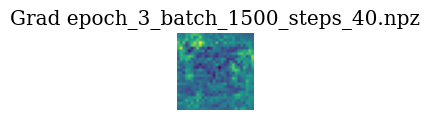

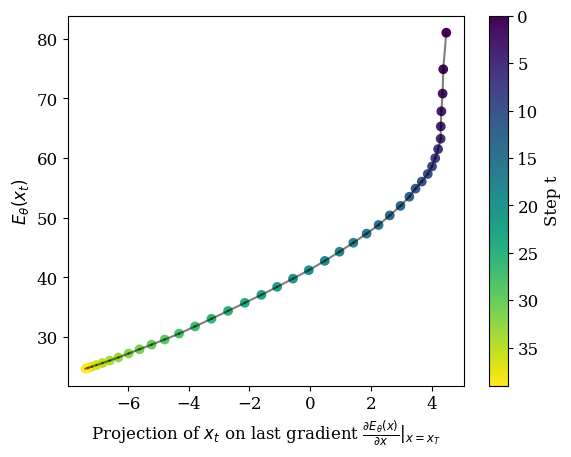

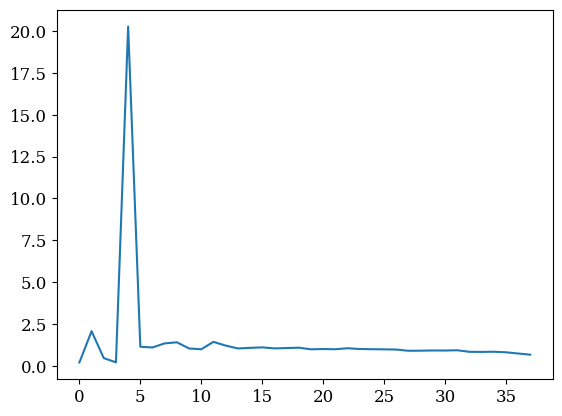

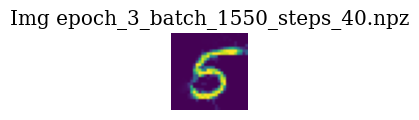

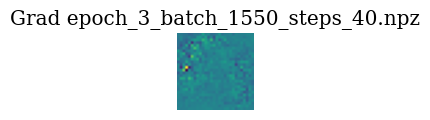

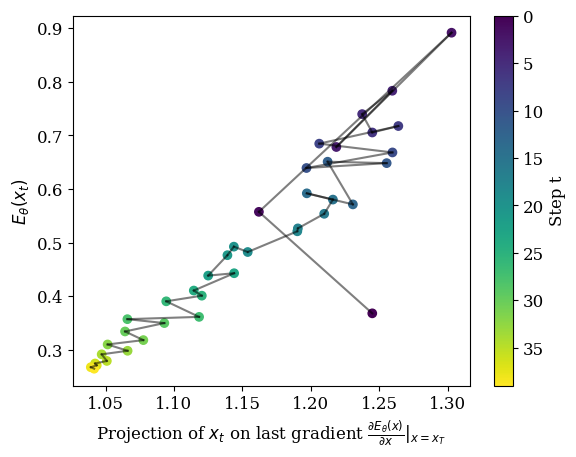

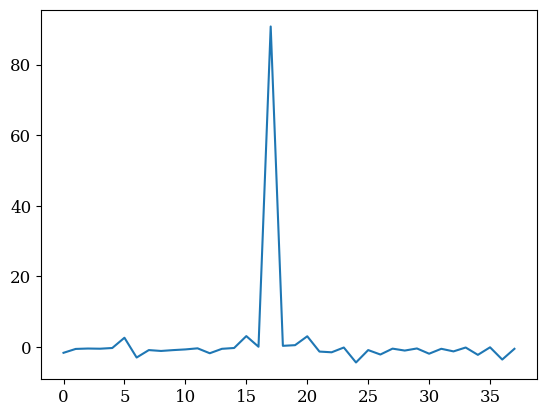

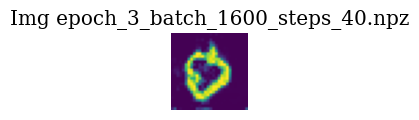

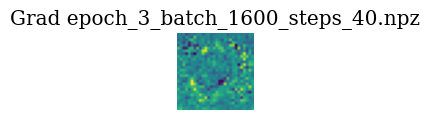

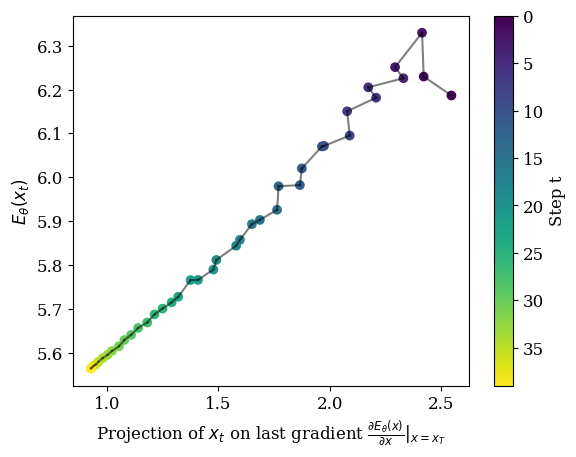

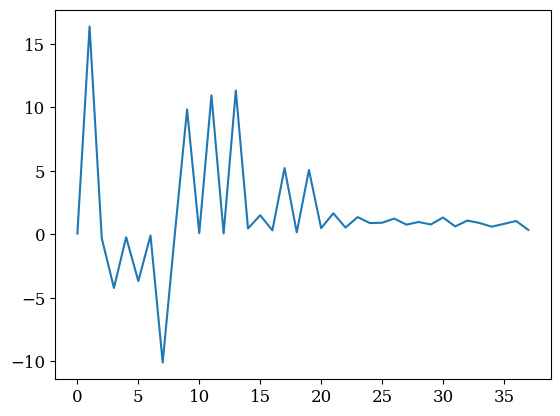

In [12]:
SHAPE = (1, 28, 28)

files = os.listdir('../images/sgld_history')
for f in files[::1]:
    data = np.load(f'../images/sgld_history/{f}')
    img_idx = 0
    imgs = data['imgs'][:,img_idx]
    energies = data['energies'][:,img_idx]
    grads = data['grads'][:,img_idx]
    
    plt.figure(figsize=(1, 1))
    plt.title(f'Img {f}')
    plt.imshow(imgs[-1].reshape(SHAPE).transpose(1, 2, 0).clip(-1, 1) * 0.5 + 0.5)
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(1, 1))
    plt.title(f'Grad {f}')
    plt.imshow(grads[-1].reshape(SHAPE).transpose(1, 2, 0).clip(-1, 1) * 0.5 + 0.5)
    plt.axis('off')
    plt.show()

    last_grad_normed = grads[-1] / np.linalg.norm(grads[-1])

    imgs_projected = []
    for img in imgs:
        imgs_projected.append((img * last_grad_normed).sum(axis=(0,1,2)))
    imgs_projected = np.array(imgs_projected)

    grads_projected = []
    for grad in grads:
        grads_projected.append((grad * last_grad_normed).sum(axis=(0,1,2)))
    grads_projected = np.array(grads_projected)

    # Set font to serif globally for this plot
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(6.4, 4.8))
    plt.scatter(imgs_projected, energies, c=range(len(imgs_projected)))
    cbar = plt.colorbar()
    cbar.set_label('Step t')
    cbar.ax.invert_yaxis()
    
    # Add arrows showing gradient direction at each point
    plot_scale = max(imgs_projected) - min(grads_projected)
    for i in range(len(imgs_projected)-1):
        start = np.array([imgs_projected[i], energies[i]])
        end = np.array([imgs_projected[i+1], energies[i+1]])
        plt.plot([start[0], end[0]], [start[1], end[1]], 'k-', alpha=0.5)

    plt.xlabel('Projection of $x_t$ on last gradient $\\frac{\\partial E_\\theta(x)}{\\partial x}|_{x=x_T}$')
    plt.ylabel('$E_\\theta(x_t)$')
    plt.show()  


    jumps = np.diff(imgs_projected)
    growth = jumps[1:] / jumps[:-1]
    plt.plot(growth)
    plt.show()